# Erzeugen von Zufallszahlen

## Normalverteilte Zufallszahlen

In [1]:
import numpy

In [18]:
numpy.random.seed( 42 )

In [20]:
numpy.random.normal( loc=0.0, scale=1.0 )

-0.13826430117118466

In [35]:
A = numpy.random.normal( loc=3, scale=1.0, size=10000 )

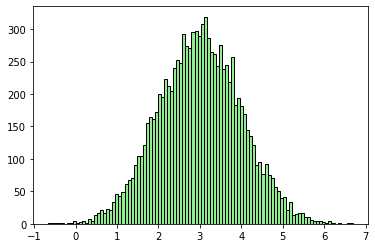

In [36]:
import matplotlib.pyplot as plt
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

In [27]:
A.min()

-0.8563753292405969

In [28]:
A.max()

7.479084251025757

## Gleichverteilte Zufallszahlen

In [40]:
numpy.random.uniform(low=-10, high=+10)

-1.025294112742488

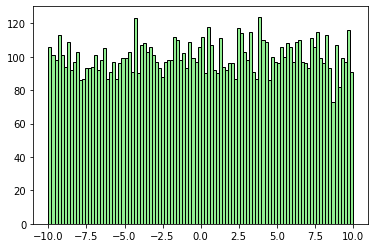

In [44]:
A = numpy.random.uniform( low=-10, high=+10, size=10000 )
import matplotlib.pyplot as plt
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

# Simulation eines Abstandssensors mit linearer Kennlinie

In [169]:
import numpy

class abstandssensor_lineare_kennlinie:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = abstand + numpy.random.normal(
                      loc=self.bias,
                      scale=self.noise)
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"

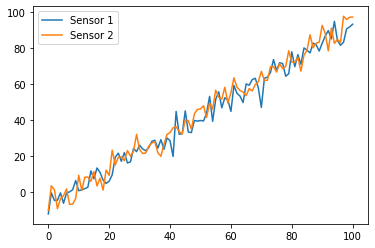

In [160]:
s1 = abstandssensor_lineare_kennlinie()
s2 = abstandssensor_lineare_kennlinie()

a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
plt.plot(a1,sw1, label="Sensor 1")
plt.plot(a2,sw2, label="Sensor 2")
plt.legend()
plt.show()

In [90]:
s1.noise, s2.noise

(1.7428240269946773, 4.143907897801963)

# Fehlerfunktion für Fusionsergebnisse

In [91]:
gw = numpy.array([1,2,3,4,5])
sensorwerte = numpy.array([0.5, 2.5, 2.5, 4.5, 5.5])
numpy.mean(abs(gw-sensorwerte)) # MAE = Mean Absolute Error

In [96]:
def MAE(gw, sensorwerte):
    MAE = numpy.mean(abs(gw-sensorwerte))
    return numpy.around(MAE,2)

In [97]:
MAE(gw, sensorwerte)

0.5

# Erster Versuch eines Fusionsansatzes (Mittelwertbildung)

## Fehler bei Verwendung nur eines Sensors

In [121]:
a1,sw1 = s1.gib_mir_kennlinien_daten()

In [122]:
a1[:5]

array([0, 1, 2, 3, 4])

In [123]:
sw1[:5]

array([ 7.62130577,  7.88439755,  7.18659731,  8.23011172, 11.59222379])

In [124]:
MAE(a1,sw1)

7.71

In [125]:
a2,sw2 = s2.gib_mir_kennlinien_daten()
MAE(a,sw)

6.93

## Sensordatenfusion über einfache Mittelwertbildung

In [127]:
sw1[:5]

array([ 7.62130577,  7.88439755,  7.18659731,  8.23011172, 11.59222379])

In [128]:
sw2[:5]

array([ 8.17286448,  7.53167863, 10.16964743,  8.46029575, 10.75598883])

In [129]:
sw_fusioniert = (sw1+sw2) / 2
sw_fusioniert[:5]

array([ 7.89708513,  7.70803809,  8.67812237,  8.34520374, 11.17410631])

In [132]:
MAE(a1, sw_fusioniert)

7.29

In [156]:
# 1. Erzeuge zwei Abstandssensoren
s1 = abstandssensor_lineare_kennlinie()
s2 = abstandssensor_lineare_kennlinie()

# 2. Bestimme experimentell die Biases
#    der beiden Sensoren
a1,sw1 = s1.gib_mir_kennlinien_daten()
bias1 = numpy.mean(a1 - sw1)
a2,sw2 = s2.gib_mir_kennlinien_daten()
bias2 = numpy.mean(a2 - sw2)

# 3. Simuliere Anwendung
a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
sw1 = sw1 + bias1
sw2 = sw2 + bias2
sw_fusioniert = (sw1+sw2) / 2

# 4. Berechne Mittleren Schätzfehler
print("Mittlerer Schätzfehler S1:", MAE(a1,sw1))
print("Mittlerer Schätzfehler S2:", MAE(a2,sw2))
print("Mittlerer Schätzfehler Fusioniert:", MAE(a1,sw_fusioniert))
print("Biase:", s1.bias, s2.bias) 

Mittlerer Schätzfehler S1: 0.87
Mittlerer Schätzfehler S2: 2.87
Mittlerer Schätzfehler Fusioniert: 1.58
Biase: 1.5304498955837627 6.9680934464784094


In [154]:
s1.bias, bias1

(-2.8003285715272375, 3.3114793731998864)

In [153]:
s2.noise

3.131161901932696

# Experiment: Immer mehr Sensoren

In [193]:
def exp(ANZ_SENSOREN, zeige_details=False):

    # 1. Erzeugen der gewünschten Anzahl von Sensoren
    alle_sensoren = []
    for sid in range(ANZ_SENSOREN):
        s = abstandssensor_lineare_kennlinie()
        alle_sensoren.append( s )

    # 2. Für jeden Sensor experimentell den
    #    Biaskorrekturwert bestimmen
    alle_biase = []
    for sid in range(ANZ_SENSOREN):
        s = alle_sensoren[sid]
        a,sw = s.gib_mir_kennlinien_daten()
        bias = numpy.mean(a - sw)
        alle_biase.append( bias )

    # 3. Simuliere Messungen
    alle_sensorwerte = []
    gw = []
    for sid in range(ANZ_SENSOREN):
        s = alle_sensoren[sid]
        a,sw = s.gib_mir_kennlinien_daten()
        sw = sw + alle_biase[sid] # Biaskorrektur!
        alle_sensorwerte.append( sw )
        gw.append( a )
        if zeige_details:
            print(f"Fehler nur Sensor {sid}: {MAE(a,sw)}")

    # 4. Fusion
    N = len(alle_sensorwerte[0])
    summen = numpy.zeros(N)
    for sid in range(ANZ_SENSOREN):
        summen += alle_sensorwerte[sid]
    fusionierte_sensorwerte = summen / ANZ_SENSOREN
    mittlerer_schaetzfehler = MAE(gw[0], fusionierte_sensorwerte)
    if zeige_details:
        print(f"Fehler bei Fusion mit {ANZ_SENSOREN}:" +
              f"{mittlerer_schaetzfehler}")
    
    return mittlerer_schaetzfehler

In [194]:
exp(3)

1.31

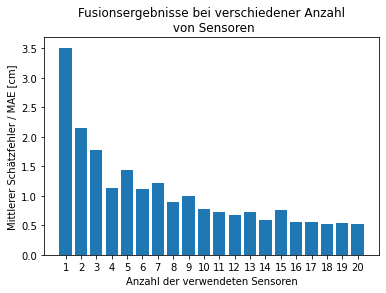

In [202]:
alle_schaetzfehler = []
sensoranzahlen = []
for ANZ_SENSOREN in range(1,21):
    schaetzfehler = exp(ANZ_SENSOREN)
    alle_schaetzfehler.append( schaetzfehler )
    sensoranzahlen.append( ANZ_SENSOREN )
    
plt.bar( sensoranzahlen, alle_schaetzfehler )
plt.xticks( sensoranzahlen )
plt.xlabel("Anzahl der verwendeten Sensoren")
plt.ylabel("Mittlerer Schätzfehler / MAE [cm]")
plt.title("Fusionsergebnisse bei verschiedener Anzahl\n" + 
          " von Sensoren")
plt.show()

In [198]:
sensoranzahlen

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Simulation eines Abstandssensors mit nicht-linearer Kennlinie

## Quizaufgabe

Nehmen Sie die alte Sensorklasse und simulieren Sie einen Sensor mit einer nicht-linearen Kennlinie!

In [215]:
import numpy

class abstandssensor_nichtlineare_kennlinie:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = numpy.log(1+abstand)*10 + numpy.random.normal(
                      loc=self.bias,
                      scale=self.noise) 
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"

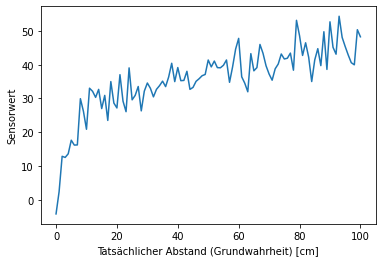

In [216]:
s1 = abstandssensor_nichtlineare_kennlinie()
s1.zeige_sensor_kennlinie()

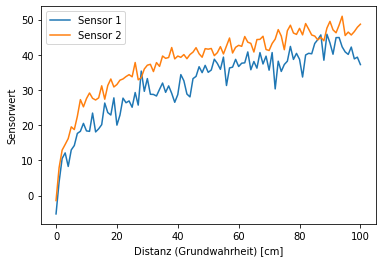

In [218]:
s1 = abstandssensor_nichtlineare_kennlinie()
s2 = abstandssensor_nichtlineare_kennlinie()

a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
plt.plot(a1,sw1, label="Sensor 1")
plt.plot(a2,sw2, label="Sensor 2")
plt.xlabel("Distanz (Grundwahrheit) [cm]")
plt.ylabel("Sensorwert")
plt.legend()
plt.show()

## Experimentelle Bestimmung eines Inversen Sensormodells (ISM)

In [220]:
ism_s1 = {}

for abstand in range(0,101):
    
    sensorwerte = []
    for run in range(0,50):
        sw = s1.gib_mir_sensorwert(abstand)
        sensorwerte.append(sw)
    
    mittlerer_sensorwert = numpy.mean(sensorwerte)
    ism_s1[mittlerer_sensorwert] = abstand

In [221]:
type(ism_s1)

dict

In [222]:
ism_s1

{-4.19284212983791: 0,
 1.4287289805835883: 1,
 6.691635836238171: 2,
 9.217775987076374: 3,
 12.109469637642746: 4,
 13.465887806592315: 5,
 14.856519789012268: 6,
 16.325723900696243: 7,
 18.013669495421894: 8,
 18.80134469877211: 9,
 19.958631227005966: 10,
 20.60300770811546: 11,
 21.56273770308154: 12,
 21.574377912000124: 13,
 22.505562979389296: 14,
 23.31942911510581: 15,
 23.639875716149017: 16,
 24.296183473556574: 17,
 24.818568369401348: 18,
 25.4197921415263: 19,
 25.86127482252474: 20,
 26.728802746040095: 21,
 27.616553348068013: 22,
 28.08971459905034: 23,
 28.200600134155287: 24,
 27.316500846016588: 25,
 28.230311125850832: 26,
 29.129757926209564: 27,
 28.87115744613619: 28,
 29.805987872411652: 29,
 29.951801146457484: 30,
 29.891177978078574: 31,
 30.780224339335135: 32,
 30.869122493073515: 33,
 31.159625279860332: 34,
 31.52148874145092: 35,
 31.887747206837844: 36,
 31.98554479842669: 37,
 31.47032886593014: 38,
 32.184054269483966: 39,
 32.650044935145345: 40,
